# Telecom Churn Prediction - Exploratory Data Analysis

Which customers are likely to churn? What are the attributes that make you think so?

The features:

- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has been a client of the company
- dependent - Whether the customer has dependents or not (Yes, No)
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client’s Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)





- customerID: Unique identifier for each customer.

- Socio-demographic : gender, SeniorCitizen, Partner, Dependents

- Service usage-related features: tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport: Service usage details.

- Payment and contract -related features: Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

- Churn: Target variable indicating if the customer churned.

In [ ]:
__author__ = "Bing Huang"
__email__ = "Binghuang1990@gmail.com"

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_raw = pd.read_csv("telecom_users.csv", index_col = 0)
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 
 17

In [44]:
df_raw.iloc[356]

customerID                         2775-SEFEE
gender                                   Male
SeniorCitizen                               0
Partner                                    No
Dependents                                Yes
tenure                                      0
PhoneService                              Yes
MultipleLines                             Yes
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                           No
TechSupport                               Yes
StreamingTV                                No
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           61.9
TotalCharges                                 
Churn                                      No
Name: 6754, dtype: object

In [45]:
# check duplicate
df_raw.duplicated().sum()

0

### datatype: totalcharges and Senior citizen

In [46]:
# change the datatype

df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')

In [47]:
df_raw.iloc[356]

customerID                         2775-SEFEE
gender                                   Male
SeniorCitizen                               0
Partner                                    No
Dependents                                Yes
tenure                                      0
PhoneService                              Yes
MultipleLines                             Yes
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                           No
TechSupport                               Yes
StreamingTV                                No
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           61.9
TotalCharges                              NaN
Churn                                      No
Name: 6754, dtype: object

In [48]:
df_raw.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [49]:
# Display rows with missing values
df_raw[df_raw.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [50]:
df_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
# SeniorCitizen: change dtype to object

df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].astype(str)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   object 
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 
 17

In [52]:
# drop missing values
df = df_raw.copy()
df = df.dropna()

In [53]:
# save the data

df.to_csv("telecom_cleaned.csv")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   object 
 2   SeniorCitizen     5976 non-null   object 
 3   Partner           5976 non-null   object 
 4   Dependents        5976 non-null   object 
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   object 
 7   MultipleLines     5976 non-null   object 
 8   InternetService   5976 non-null   object 
 9   OnlineSecurity    5976 non-null   object 
 10  OnlineBackup      5976 non-null   object 
 11  DeviceProtection  5976 non-null   object 
 12  TechSupport       5976 non-null   object 
 13  StreamingTV       5976 non-null   object 
 14  StreamingMovies   5976 non-null   object 
 15  Contract          5976 non-null   object 
 16  PaperlessBilling  5976 non-null   object 
 17

In [55]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000
mean,32.523092,64.846687,2298.060617
std,24.500858,30.107576,2274.127165
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,404.312500
50%,29.000000,70.425000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


### Check distributions

In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
df = df.drop('customerID', axis = 1)

In [58]:
len(df.columns)

20

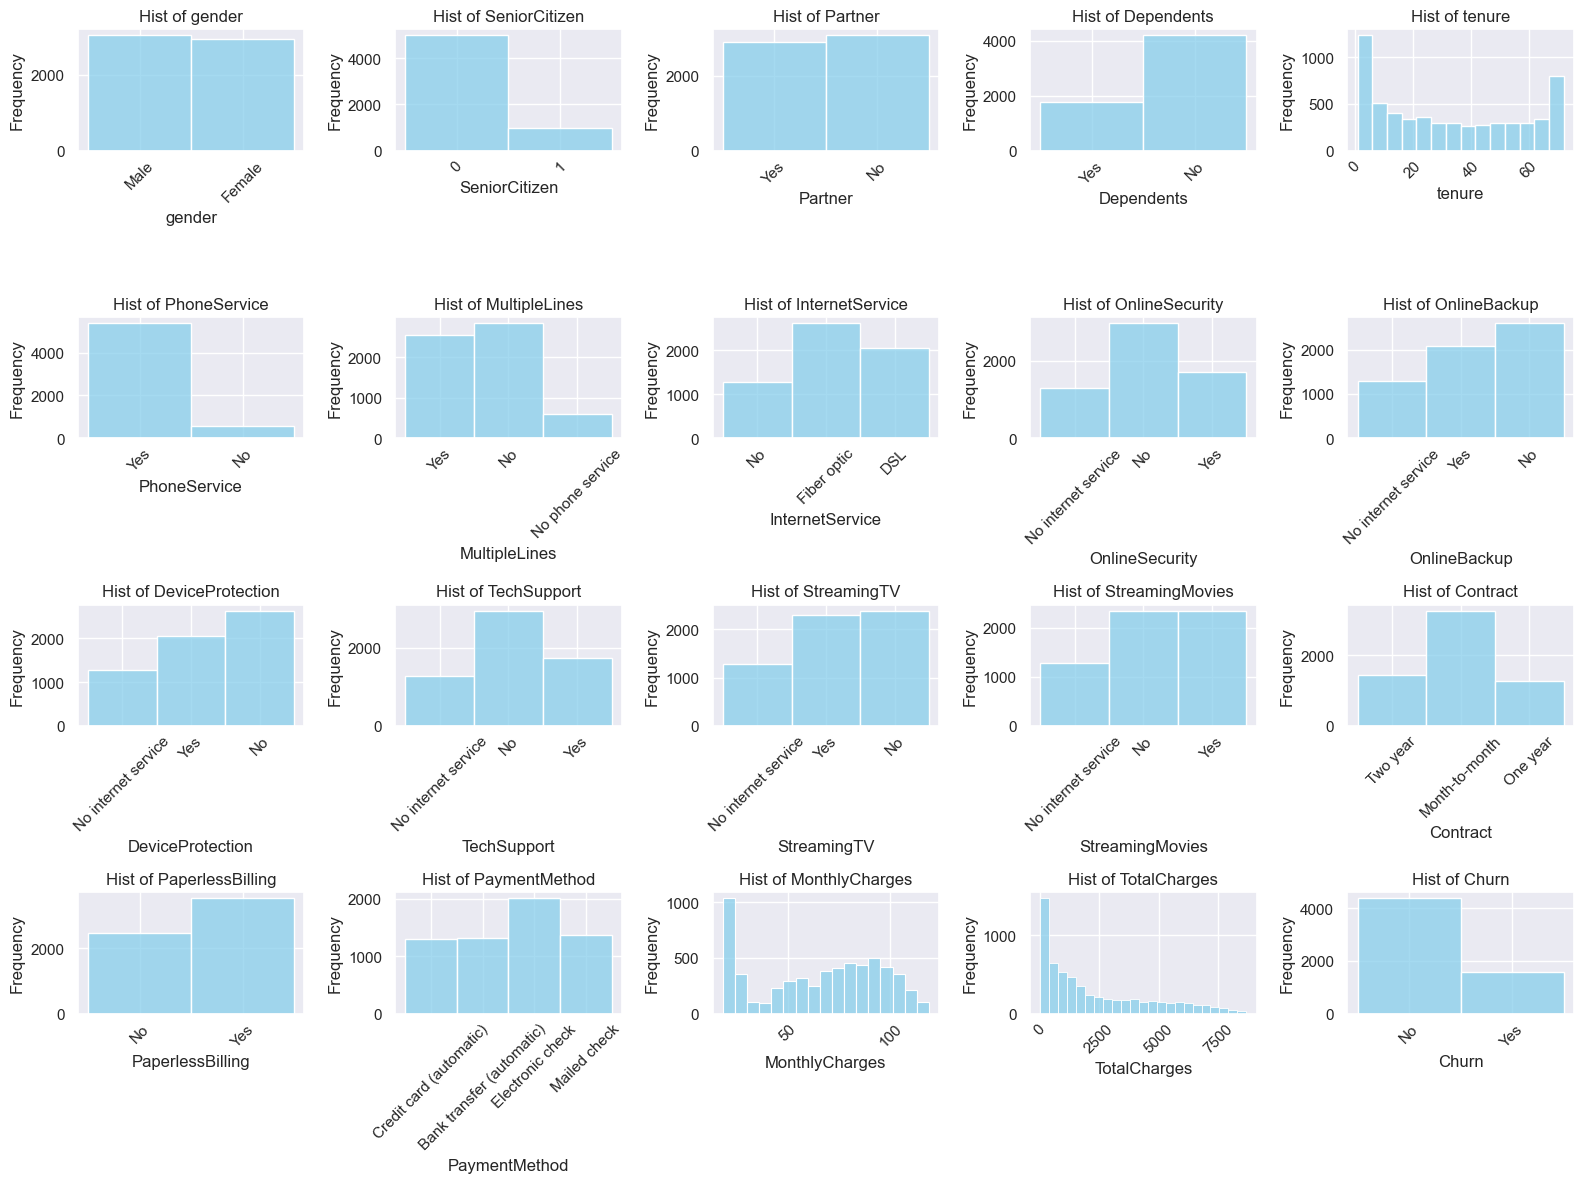

In [59]:
sns.set(style = "darkgrid")
fig, axes = plt.subplots(4, 5, figsize=(16, 12))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], color = "skyblue")
    axes[i].set_title(f'Hist of {col}')
    axes[i].tick_params(axis='x', rotation=45, size = 2)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

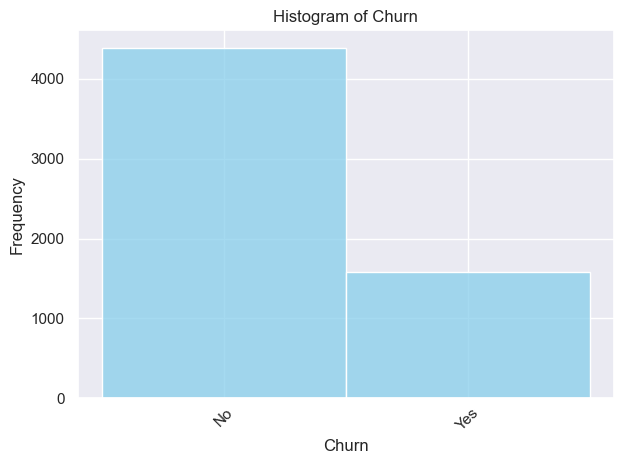

In [87]:
sns.set(style="darkgrid")


fig, ax = plt.subplots()  # Create a single figure and axis

sns.histplot(df['Churn'], ax=ax, color="skyblue")
ax.set_title('Histogram of Churn')  # Correctly setting the title
ax.tick_params(axis='x', rotation=45, size=2)  # Rotate x-axis labels
ax.set_ylabel('Frequency')  # Setting the y-axis label

plt.tight_layout()
plt.show()

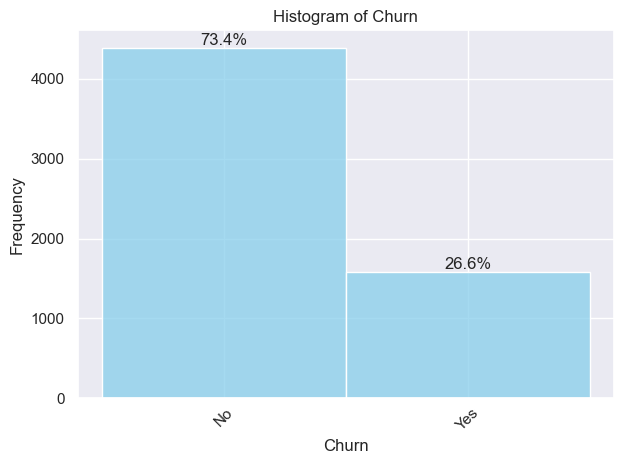

In [88]:
sns.set(style="darkgrid")

# Create a single figure and axis
fig, ax = plt.subplots()

# Create the histogram for the 'Churn' column
hist_data = sns.histplot(df['Churn'], ax=ax, color="skyblue")

# Set title and labels
ax.set_title('Histogram of Churn')
ax.tick_params(axis='x', rotation=45, size=2)
ax.set_ylabel('Frequency')

# Calculate and annotate percentages
total = len(df['Churn'])  # Total number of data points
for p in hist_data.patches:  # Iterate through the bars (patches)
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}',  # Convert count to percentage
                (p.get_x() + p.get_width() / 2., height),  # Position of the text
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust the layout
plt.tight_layout()
plt.show()

Plots as groups

Target Variable：
Churn

Features:
- Socio-demographic variables:
  - Custom ID
  - gender, 
  - Senior Citizen,
  - Partner, 
  - Dependents
- Service usage variables:
  - PhoneService, 
  - MultipleLines, 
  - InternetService, 
  - OnlineSecurity, 
  - OnlineBackup, 
  - TechSupport
- Contract and Payment variables:
  - PaperlessBilling,
  - PaymentMethod, 
  - MonthlyCharges, 
  - TotalCharges
  - Tenure



In [60]:
# only Churn



### Seperate numeric and categoric data

In [61]:
col_cat = df.select_dtypes(include = 'object').columns
col_num = df.select_dtypes(exclude = 'object').columns

### Numeric data analysis - Box plot

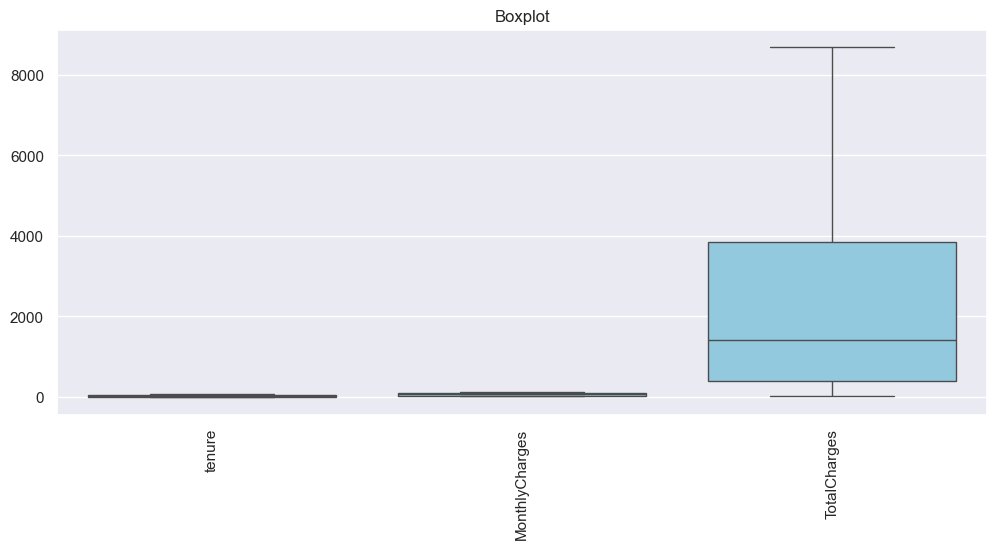

In [62]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, color='skyblue')
plt.title('Boxplot')
plt.xticks(rotation=90)
plt.show()

In [63]:
col_num

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

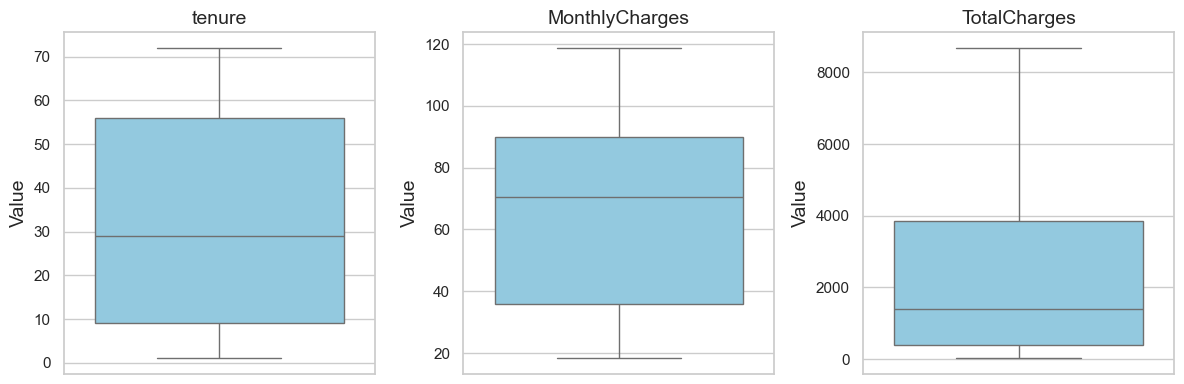

In [64]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes = axes.flatten() # Flatten axes for easy iteration

for i, col in enumerate(col_num):
    sns.boxplot(data=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}',fontsize=14)
    axes[i].set_ylabel('Value',fontsize=14)

plt.tight_layout()
plt.show();


### Numeric data analysis - Heatmap

<module 'matplotlib.pyplot' from 'c:\\Users\\bingh\\.conda\\envs\\MLG\\lib\\site-packages\\matplotlib\\pyplot.py'>

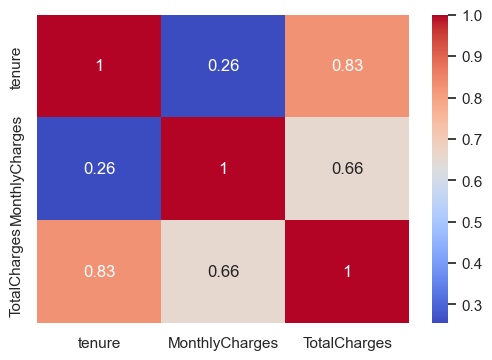

In [65]:
corr = df[col_num].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt

### ”Churn“ - numeric variables- Boxplot


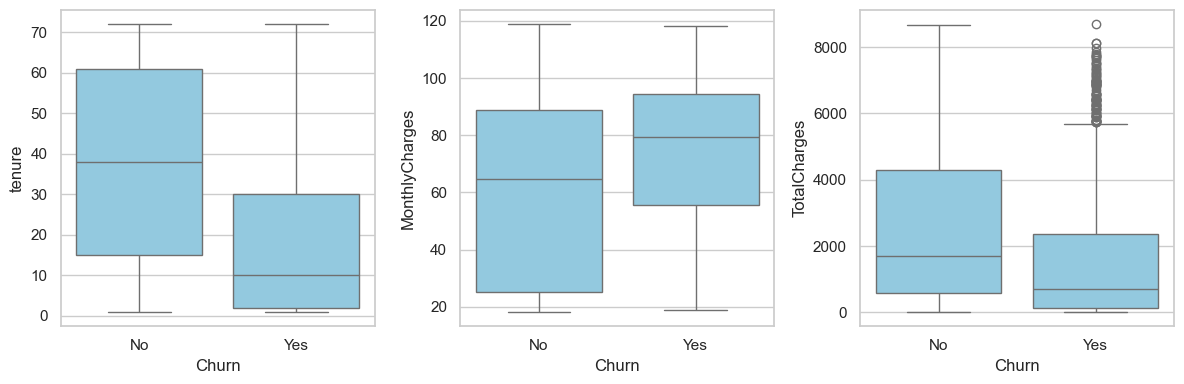

In [66]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes = axes.flatten() # Flatten axes for easy iteration

for i, col in enumerate(col_num):
    sns.boxplot(x='Churn', y=df[col], data=df, ax=axes[i], color= 'skyblue')  # Assign plot to the correct axis

plt.tight_layout()
plt.show();


### ”Churn“ - cat variables - Chi2

In [67]:
# from scipy.stats import chi2_contingency

# contingency_table = pd.crosstab(df['categorical_column1'], df['categorical_column2'])
# chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

# print(f"Chi2 Stat: {chi2_stat}, p-value: {p}")

In [68]:
col_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

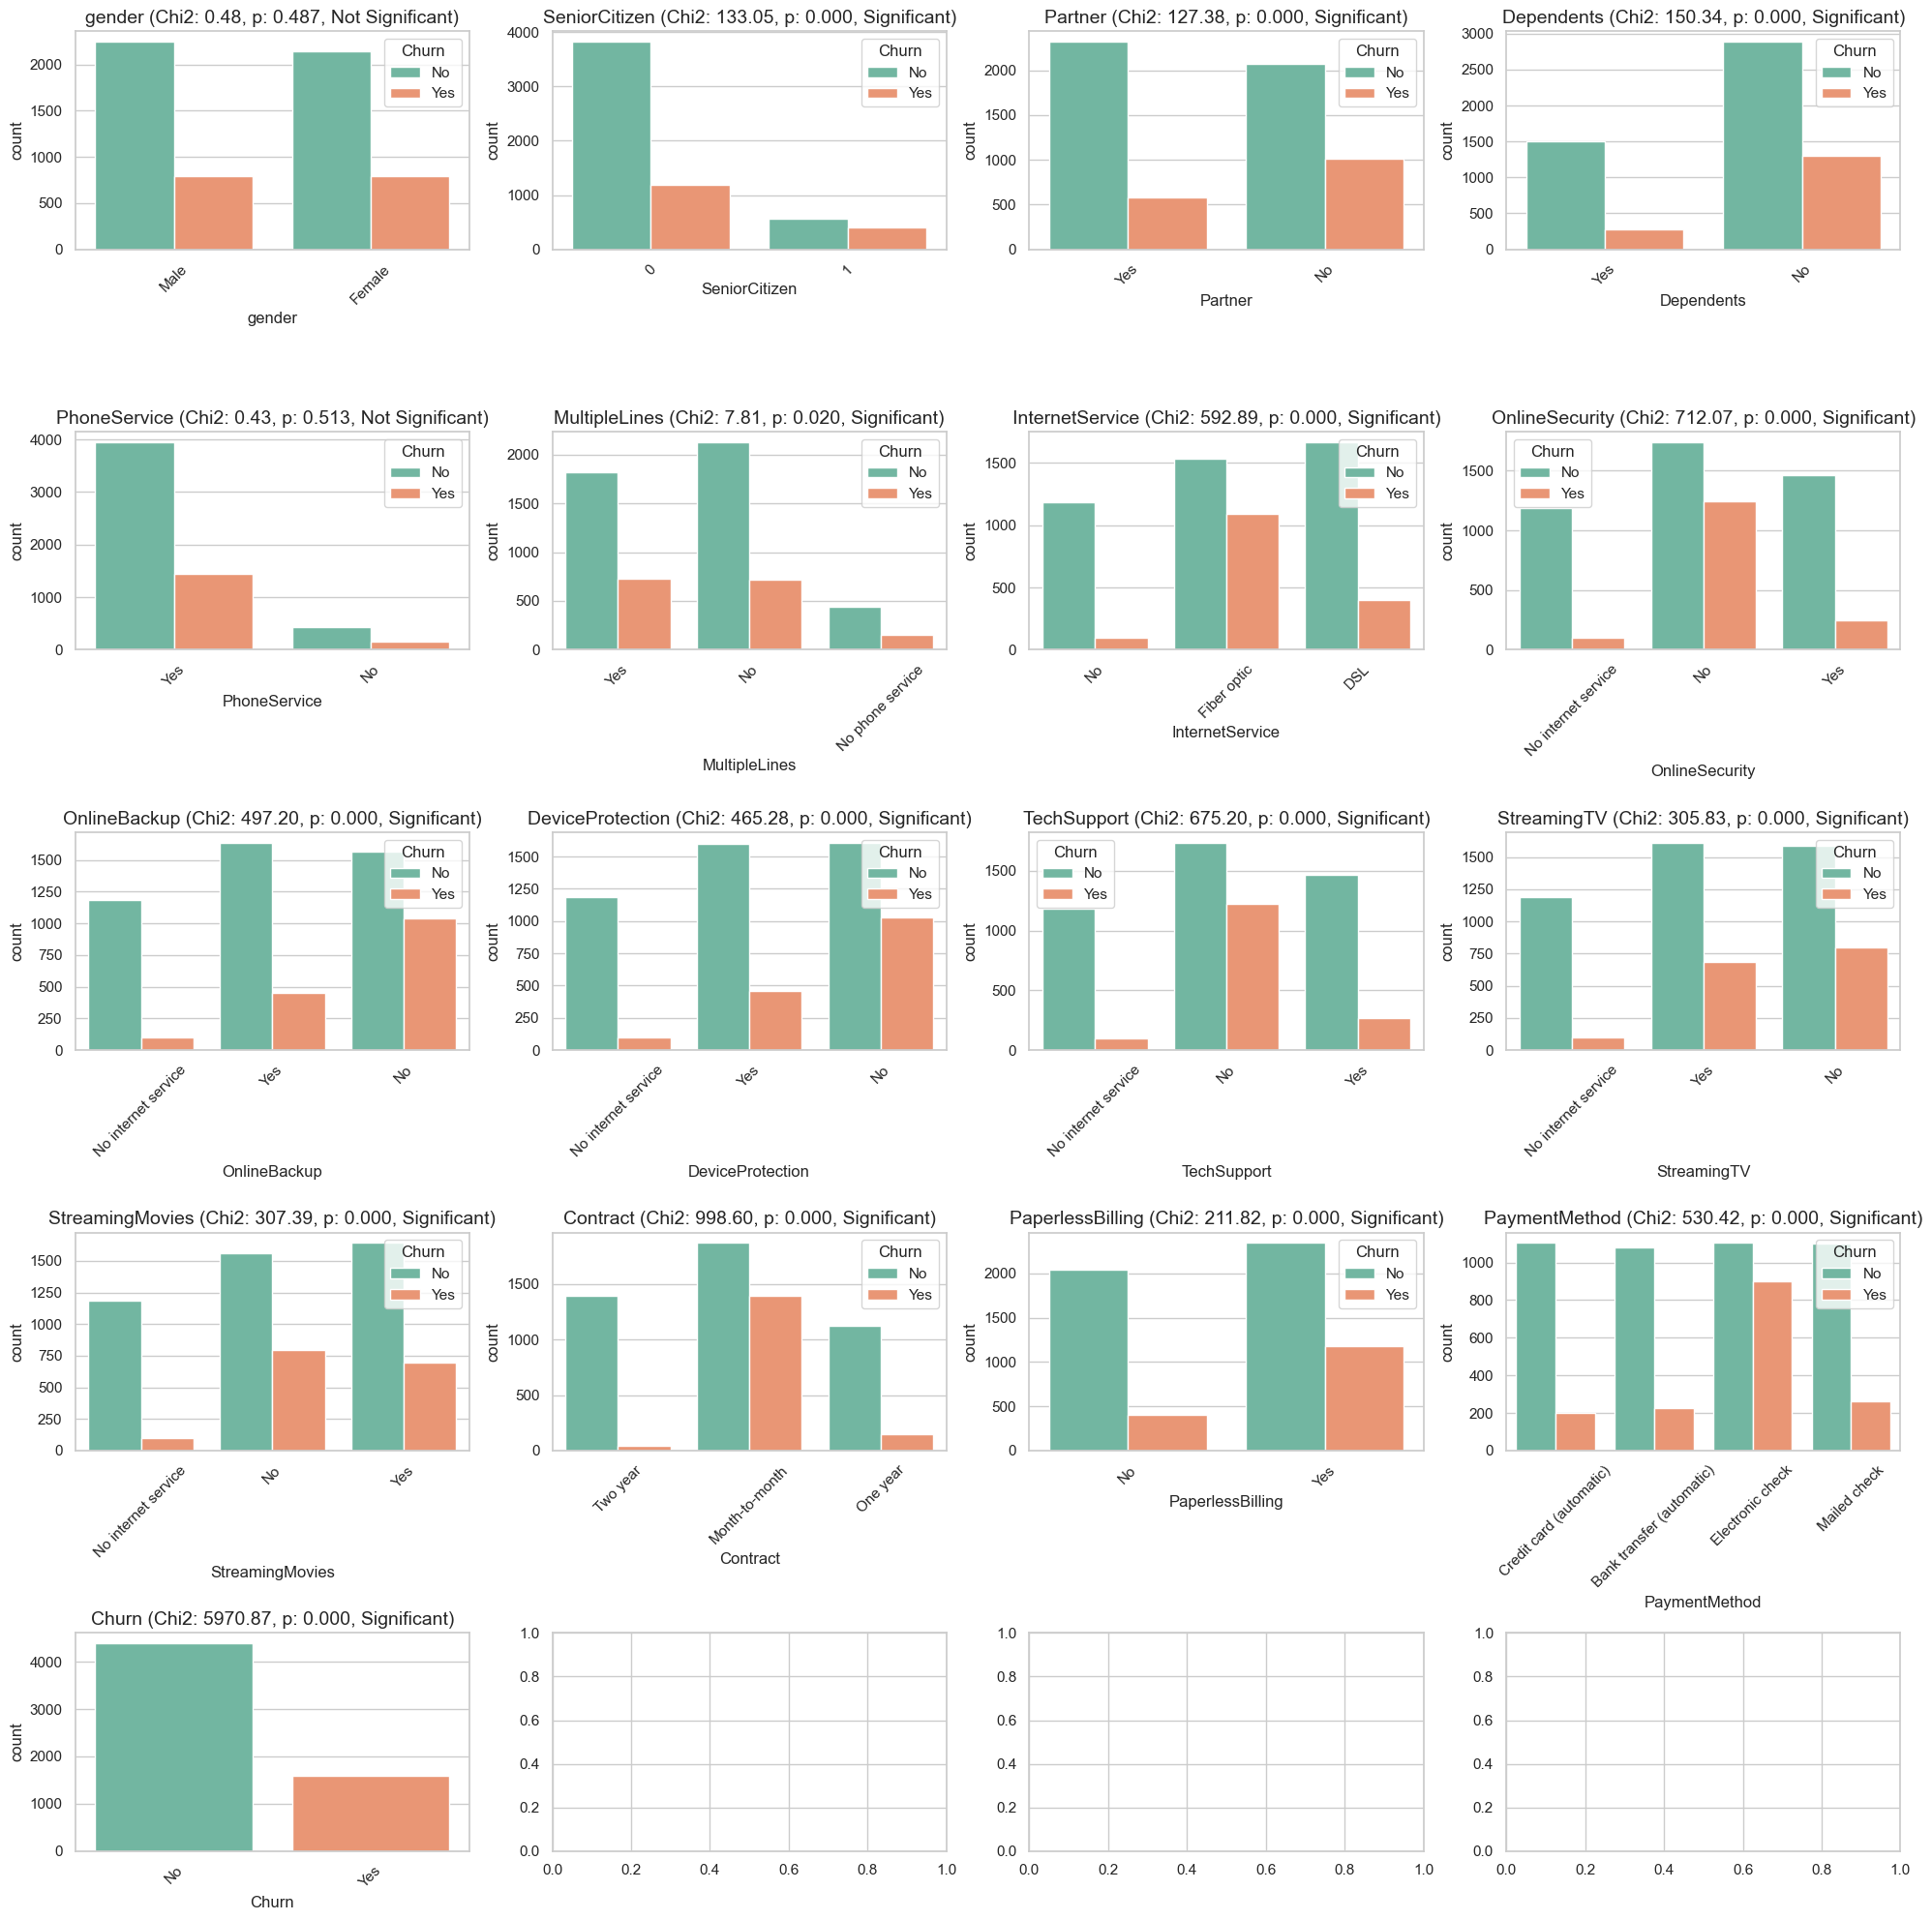

In [69]:
from scipy.stats import chi2_contingency


sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(col_cat):

    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

    significance = "Significant" if p < 0.05 else "Not Significant"

    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='Set2')

    axes[i].set_title(f'{col} (Chi2: {chi2_stat:.2f}, p: {p:.3f}, {significance})', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [70]:
col_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [71]:
col_social = col_cat[:4]


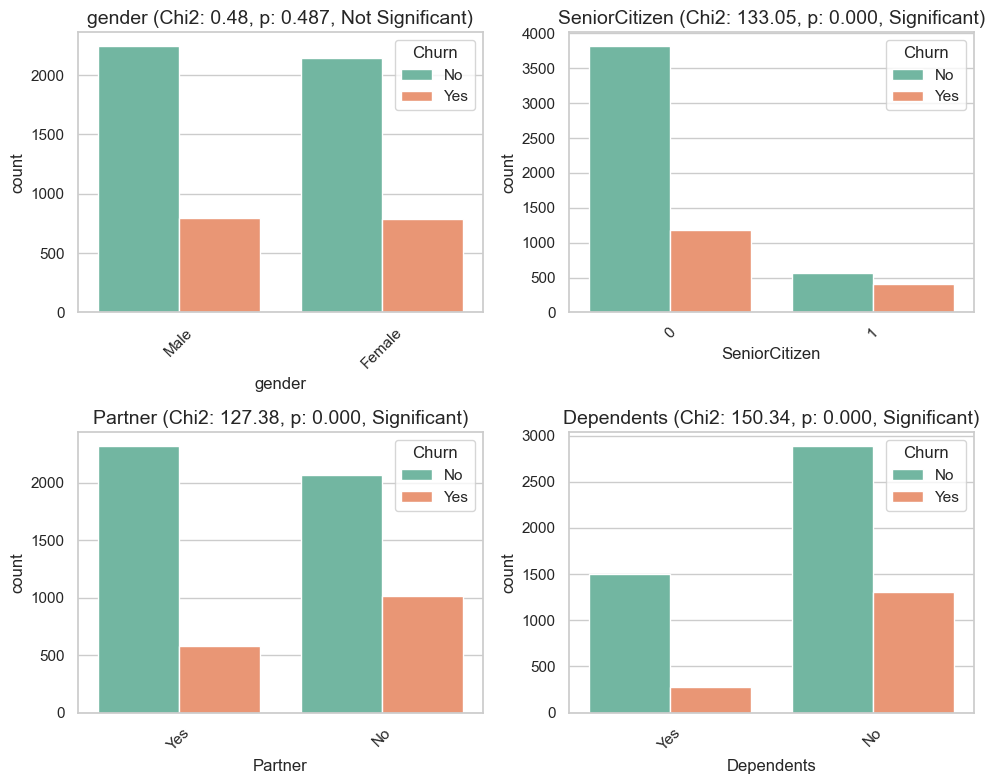

In [73]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(col_social):

    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

    significance = "Significant" if p < 0.05 else "Not Significant"

    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='Set2')

    axes[i].set_title(f'{col} (Chi2: {chi2_stat:.2f}, p: {p:.3f}, {significance})', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [75]:
col_service = col_cat[4:13]
col_service

Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

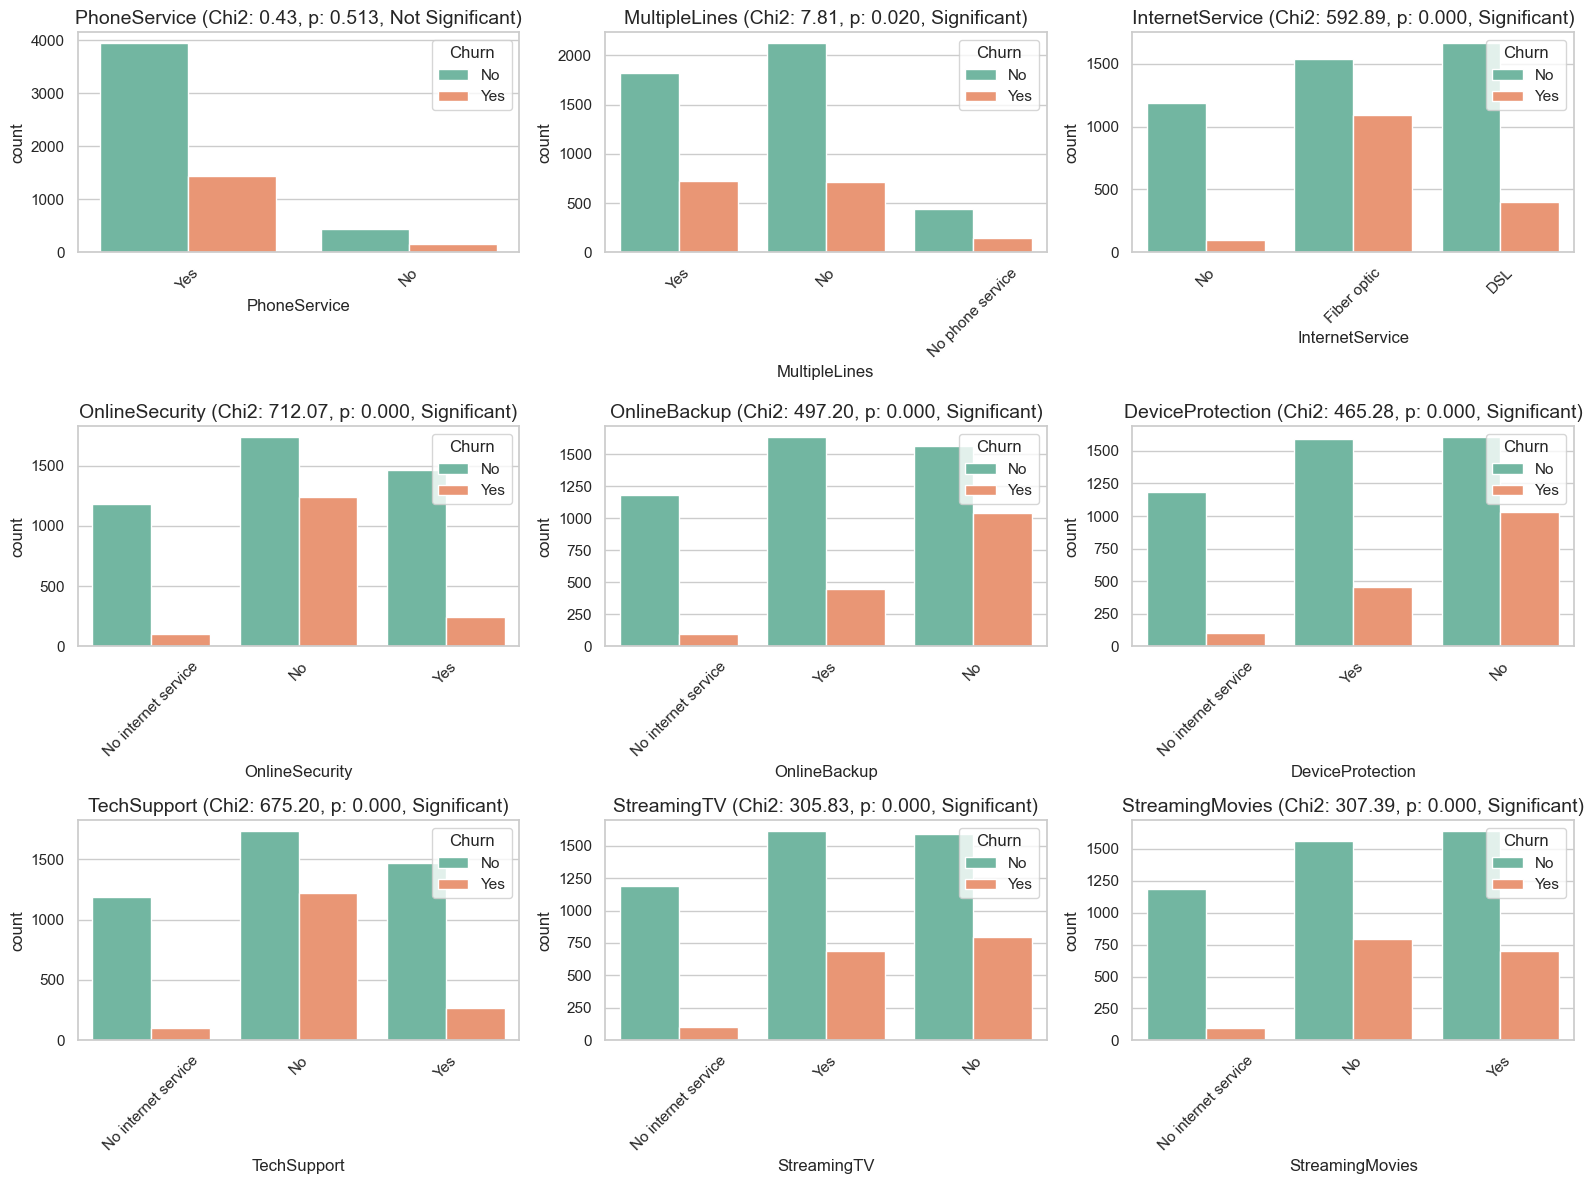

In [79]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(col_service):

    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

    significance = "Significant" if p < 0.05 else "Not Significant"

    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='Set2')

    axes[i].set_title(f'{col} (Chi2: {chi2_stat:.2f}, p: {p:.3f}, {significance})', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [80]:
col_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [81]:
col_contract = ['Contract', 'PaperlessBilling', 'PaymentMethod']

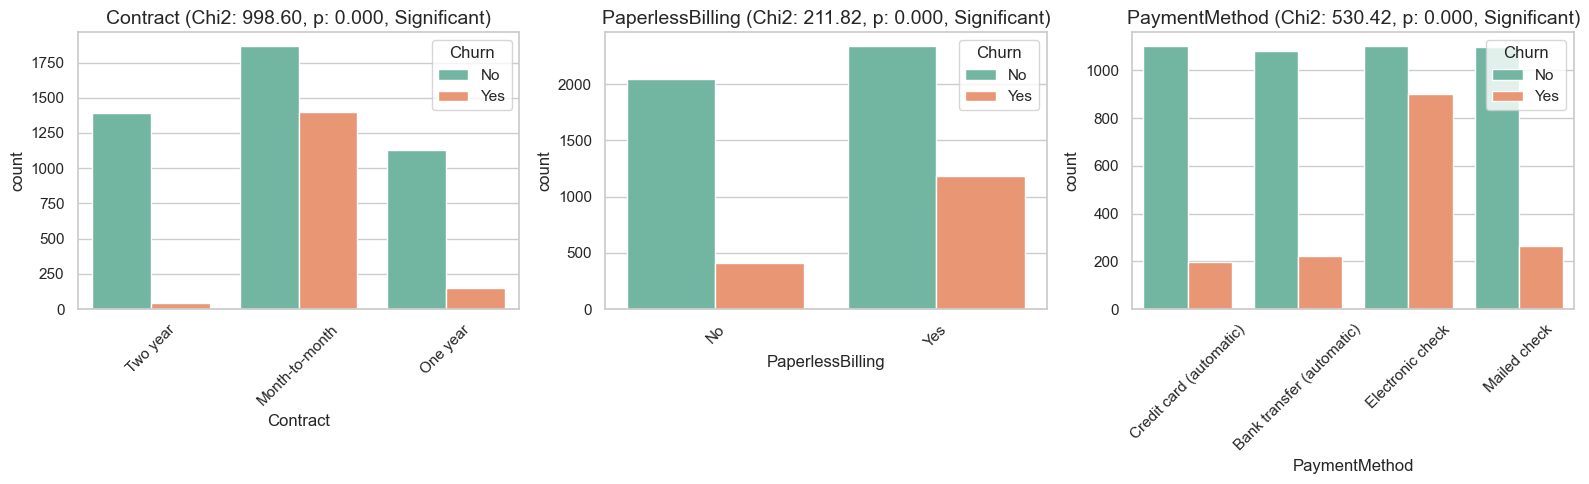

In [85]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
axes = axes.flatten()

for i, col in enumerate(col_contract):

    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

    significance = "Significant" if p < 0.05 else "Not Significant"

    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='Set2')

    axes[i].set_title(f'{col} (Chi2: {chi2_stat:.2f}, p: {p:.3f}, {significance})', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()